# EDA2

## import dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps  # Import PPS library

In [6]:
# 1. Data Exploration and Preprocessing
file_path = "adult_with_headers.csv"
df = pd.read_csv(file_path)

In [7]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
# Summary statistics and missing values check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
# Scaling Numerical Features
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

In [12]:
# 2. Encoding Techniques
one_hot_cols = ['sex', 'income', 'race', 'relationship']
label_encode_cols = ['workclass', 'education', 'marital_status', 'occupation', 'native_country']

In [13]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [14]:
# Label Encoding
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
# 3. Feature Engineering
df['work_experience'] = df['age'] - (df['education_num'] + 6)
df['capital_investment'] = df['capital_gain'] - df['capital_loss']
df['log_fnlwgt'] = np.log1p(df['fnlwgt'])

In [16]:
# 4. Feature Selection
## Outlier Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier_score'] = iso_forest.fit_predict(df[numerical_cols])
df = df[df['outlier_score'] == 1].drop(columns=['outlier_score'])

In [17]:
## Predictive Power Score Analysis
pps_matrix = pps.matrix(df)

In [18]:
# Correlation Matrix
correlation_matrix = df.corr()

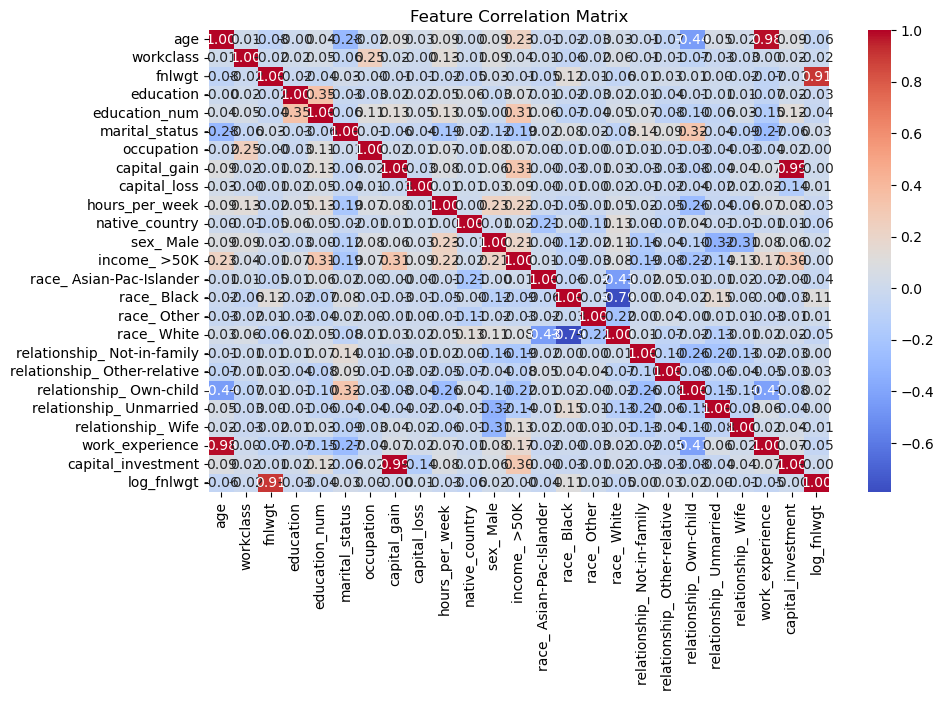

,x,y,ppscore
0,age,age,1.0
286,sex_ Male,sex_ Male,1.0
78,education,education,1.0
79,education,education_num,1.0
103,education_num,education,1.0
104,education_num,education_num,1.0
130,marital_status,marital_status,1.0
156,occupation,occupation,1.0
182,capital_gain,capital_gain,1.0
208,capital_loss,capital_loss,1.0


In [19]:
# Visualization
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False).head(10)